<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data
customers = pd.read_csv('../data/Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
print(customers.shape)
print(customers.dtypes)

missing_info = pd.DataFrame({
    "has_missing": customers.isna().any(),
    "missing_count": customers.isna().sum(),
    "missing_pct": (customers.isna().sum() / len(customers) * 100).round(2)
})

missing_info = missing_info[missing_info["has_missing"]]
cols_with_na = missing_info.index.tolist()

if len(cols_with_na) != 0:
    print(missing_info)
    print(cols_with_na)
else:
    print("\nDataset has no missing value")

customers.describe()




(440, 8)
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Dataset has no missing value


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

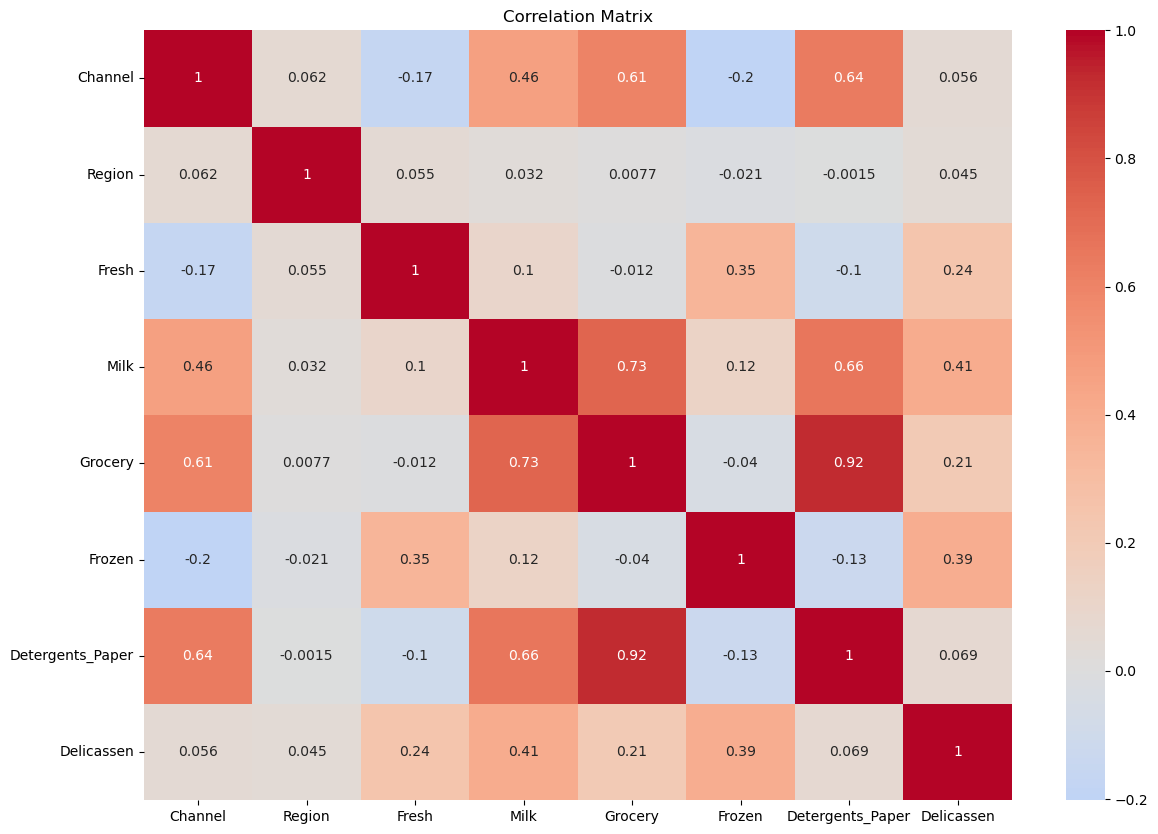

In [4]:
corr_matrix = customers.corr(numeric_only=True)
print(corr_matrix)

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [5]:
# Your code here
# Define correlation threshold
threshold = 0.9

# Store highly correlated column pairs
high_corr_pairs = []

# Loop through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((col1, col2, round(corr_value, 2)))

# Sort the list by absolute correlation value (descending)
high_corr_pairs_sorted = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Display results
print("Highly correlated pairs (|corr| > 0.9), sorted from strongest to weakest:")
for col1, col2, corr in high_corr_pairs_sorted:
    print(f"{col1} <--> {col2} | Corr: {corr}")

Highly correlated pairs (|corr| > 0.9), sorted from strongest to weakest:
Grocery <--> Detergents_Paper | Corr: 0.92


<Figure size 800x500 with 0 Axes>

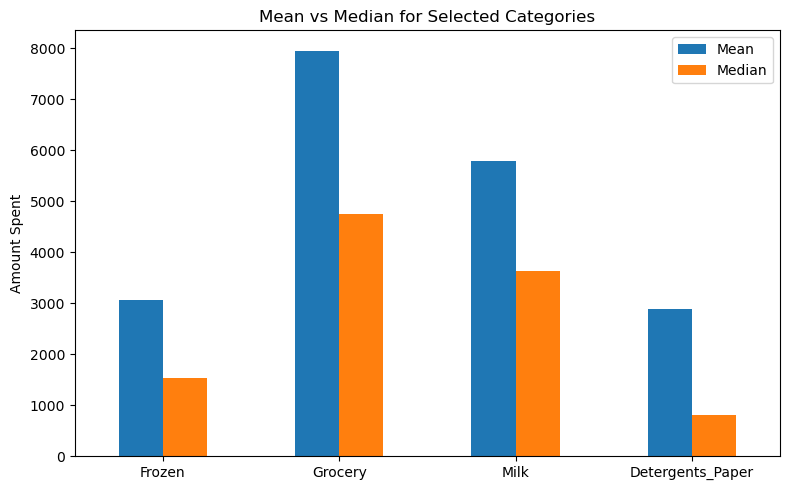

In [6]:
# Plotting for columns with high mean compare to median
cols = ['Frozen', 'Grocery', 'Milk', 'Detergents_Paper']

# Stats
stats = customers[cols].agg(['mean', 'median']).T

# 4) Plot
plt.figure(figsize=(8, 5))
stats.plot(kind='bar', y=['mean', 'median'], figsize=(8, 5))
plt.title('Mean vs Median for Selected Categories')
plt.ylabel('Amount Spent')
plt.xticks(rotation=0)
plt.legend(['Mean', 'Median'])
plt.tight_layout()
plt.show()

In [7]:
# Pareto

# 1. Copy the dataset
df_pareto = customers.copy()

# 2. Total sales for all categories
df_pareto['Total'] = df_pareto[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)

# 3. Sorting
pareto = df_pareto.sort_values('Total', ascending=False).reset_index(drop=True)

# 4. Calculate the cumulative percentage
pareto['CumPct'] = pareto['Total'].cumsum() / pareto['Total'].sum() * 100

# 5. How many customers to reach 80% of turnover?
n_clients_80 = pareto[pareto['CumPct'] <= 80].shape[0]
pct_clients_80 = n_clients_80 / len(pareto) * 100

print(f"Pareto : {pct_clients_80:.1f}% of customers (~{n_clients_80} sur {len(pareto)}) cover 80% of the total of sales. ")


Pareto : 57.0% of customers (~251 sur 440) cover 80% of the total of sales. 


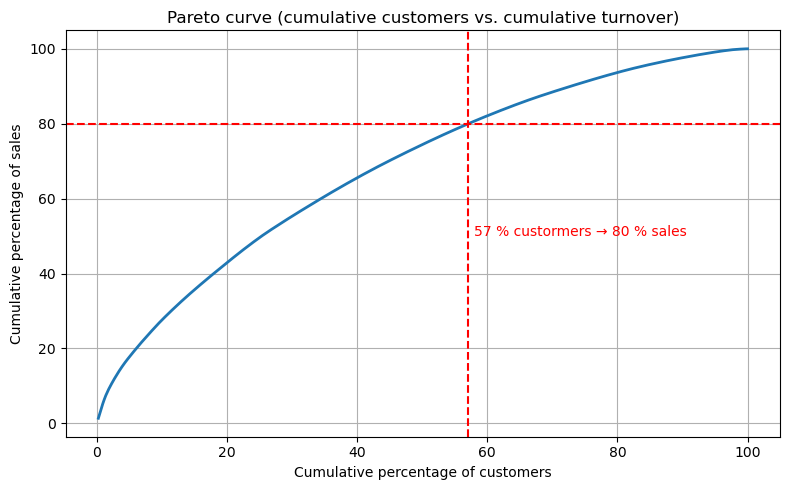

In [8]:
# Pour l’axe x, on crée le pourcentage cumulé de clients
pareto['CustomerPct'] = (pareto.index + 1) / len(pareto) * 100

plt.figure(figsize=(8,5))
plt.plot(pareto['CustomerPct'], pareto['CumPct'], lw=2)
plt.axhline(80, color='red', ls='--')
plt.axvline(57, color='red', ls='--')
plt.text(57+1, 50, "57 % custormers → 80 % sales", color='red')
plt.xlabel("Cumulative percentage of customers")
plt.ylabel("Cumulative percentage of sales")
plt.title("Pareto curve (cumulative customers vs. cumulative turnover)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Top 3 biggest customers table
pareto.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,CumPct,CustomerPct
0,2,3,16117,46197,92780,1026,40827,2944,199891,1.367290,0.227273
1,2,3,44466,54259,55571,7782,24171,6465,192714,2.685489,0.454545
2,1,3,112151,29627,18148,16745,4948,8550,190169,3.986279,0.681818


**Your observations here**

- Columns Frozen, Grocery, Milk, and Detergents_Paper, all have a mean much higher than their median, revealing a strongly right-skewed distribution, driven by a few customers with very large purchases.
- All columns are interger which perfect to use a numerical model like Kmeans
- No missing value in the dataset
- Colinearity : 2 columns are strongly correlated : "Grocery" and "Detergents_Paper", i might find a way to make a fusion with those 2 (maybe by sum or by average?)
- Pareto law is not representative is this specific dataset : 57.0% of customers (~251 sur 440) cover 80% of the total of sales even tho 3 or 3 custormers are very big. I can dive deeper before clusterisation but not today.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [10]:
# Your code here
# Colinearity : Feature aggregation on Grocery and Detergents_Paper
customers['Grocery_Detergents'] = (
    customers['Grocery'] + customers['Detergents_Paper']
)

# Removing Grocery and Detergents_Paper columns
customers = customers.drop(columns=['Grocery', 'Detergents_Paper'])

**Your comment here**

-  I proceed a feature aggregation on Grocery and Detergents_Paper
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [11]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
# Columns to standardize
features = ['Fresh','Milk','Grocery_Detergents','Frozen','Delicassen']

# 1) Log1p : reducing skewness
customers_scaled = customers.copy()
customers_scaled = np.log1p(customers_scaled[features])

# 2) Standardization (mean=0, std=1)
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers_scaled)
customers_scaled

array([[ 0.4861845 ,  0.97629884,  0.47482966, -1.50924981,  0.40896595],
       [ 0.08788863,  0.99095612,  0.67097095,  0.13405226,  0.62792606],
       [ 0.01635628,  0.89115098,  0.5522088 ,  0.37689926,  1.77683339],
       ...,
       [ 0.57952767,  1.41399051,  1.74825155, -0.95351417,  0.66656608],
       [ 0.34460869, -0.49078257, -0.77058122, -0.27890118,  0.76666284],
       [-0.54442663, -0.63351532, -0.58272594, -2.43158276, -2.0896139 ]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [12]:
from sklearn.cluster import KMeans

# Your code here:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(customers_scaled)
customers['labels'] = kmeans.labels_

c:\Users\jeand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Looking at the Elbow method

c:\Users\jeand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jeand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jeand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jeand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

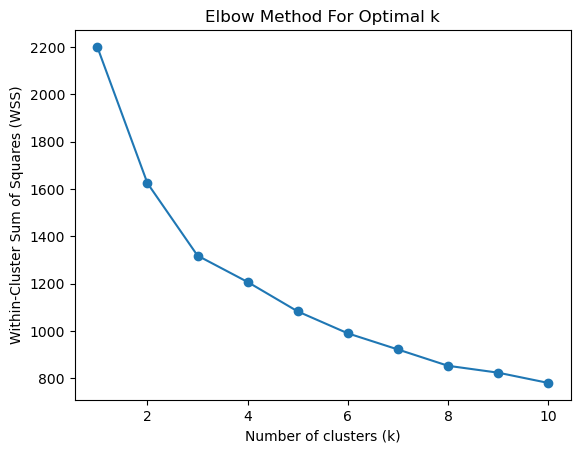

In [13]:

wss = []  # List to store within-cluster sum of squares

# Try k values from 1 to 10 (or more)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scaled)
    wss.append(kmeans.inertia_)  # inertia_ is WSS

# Plot the elbow graph
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [14]:
#kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

#labels = kmeans_2.predict(customers_scale)

#clusters = kmeans_2.labels_.tolist()

In [15]:
from sklearn.metrics import silhouette_score
kmeans_2 = KMeans(n_clusters=2,random_state =42).fit(customers_scaled)
customers['kmeans_labels'] = kmeans_2.labels_

c:\Users\jeand\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Count the values in `labels`.

In [16]:
# Your code here:
customers['kmeans_labels'].value_counts()

kmeans_labels
1    238
0    202
Name: count, dtype: int64

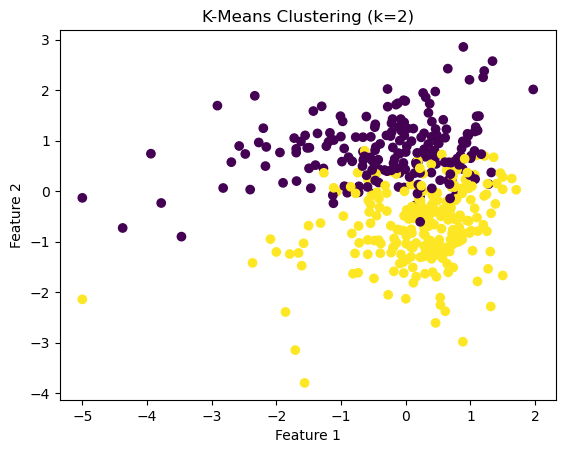

In [17]:
plt.scatter(customers_scaled[:, 0], customers_scaled[:, 1], c=kmeans_2.labels_, cmap='viridis')
plt.title("K-Means Clustering (k=2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [18]:
### Silhouette score

# Calculate silhouette score on scaled data with cluster labels
score = silhouette_score(customers_scaled, kmeans_2.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.2596279912529027


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [19]:
customers

,Channel,Region,Fresh,Milk,Frozen,Delicassen,Grocery_Detergents,labels,kmeans_labels
0,2,3,12669,9656,214,1338,10235,3,0
1,2,3,7057,9810,1762,1776,12861,3,0
2,2,3,6353,8808,2405,7844,11200,3,0
3,1,3,13265,1196,6404,1788,4728,2,1
4,2,3,22615,5410,3915,5185,8975,3,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,13135,2204,16209,3,0
436,1,3,39228,1431,4510,2346,857,2,1
437,2,3,14531,15488,437,1867,45084,3,0
438,1,3,10290,1981,1038,2125,2400,2,1


In [20]:
customers_scaled

array([[ 0.4861845 ,  0.97629884,  0.47482966, -1.50924981,  0.40896595],
       [ 0.08788863,  0.99095612,  0.67097095,  0.13405226,  0.62792606],
       [ 0.01635628,  0.89115098,  0.5522088 ,  0.37689926,  1.77683339],
       ...,
       [ 0.57952767,  1.41399051,  1.74825155, -0.95351417,  0.66656608],
       [ 0.34460869, -0.49078257, -0.77058122, -0.27890118,  0.76666284],
       [-0.54442663, -0.63351532, -0.58272594, -2.43158276, -2.0896139 ]])

In [21]:
from sklearn.cluster import DBSCAN 

# Your code here

dbscan = DBSCAN(eps=0.5, min_samples=5)  # adjust these parameters
dbscan.fit(customers_scaled)

DBSCAN()

Count the values in `labels_DBSCAN`.

In [22]:
# Your code here
customers["db_labels"] = dbscan.labels_
customers["db_labels"].value_counts()

db_labels
-1    396
 0     11
 2      8
 3      7
 5      7
 1      6
 4      5
Name: count, dtype: int64

In [23]:
customers.head()

,Channel,Region,Fresh,Milk,Frozen,Delicassen,Grocery_Detergents,labels,kmeans_labels,db_labels
0,2,3,12669,9656,214,1338,10235,3,0,-1
1,2,3,7057,9810,1762,1776,12861,3,0,1
2,2,3,6353,8808,2405,7844,11200,3,0,-1
3,1,3,13265,1196,6404,1788,4728,2,1,-1
4,2,3,22615,5410,3915,5185,8975,3,0,-1


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [24]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

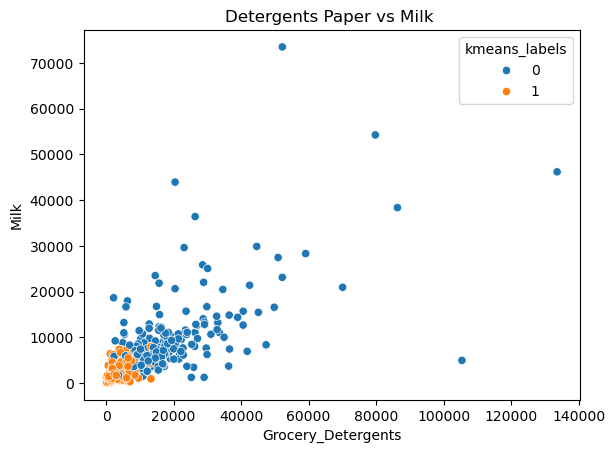

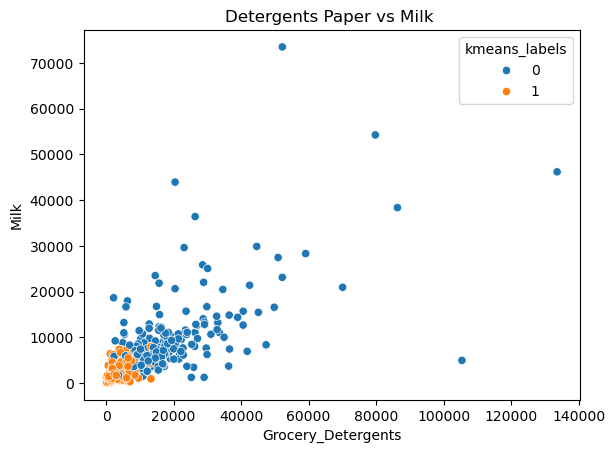

In [25]:
# Your code here:
plot(customers['Grocery_Detergents'],customers["Milk"],customers["kmeans_labels"])
plot(customers['Grocery_Detergents'],customers["Milk"],customers["kmeans_labels"])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

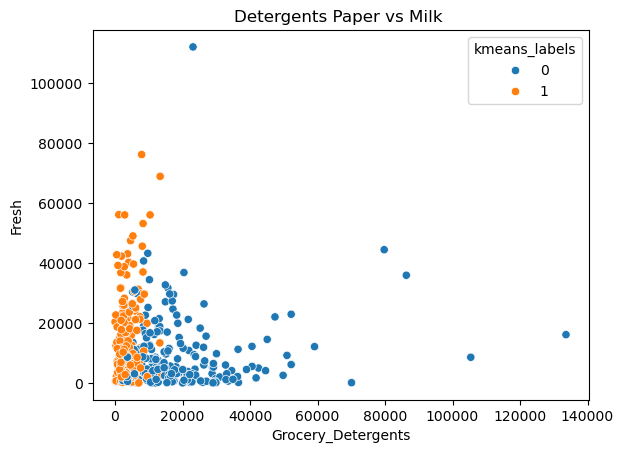

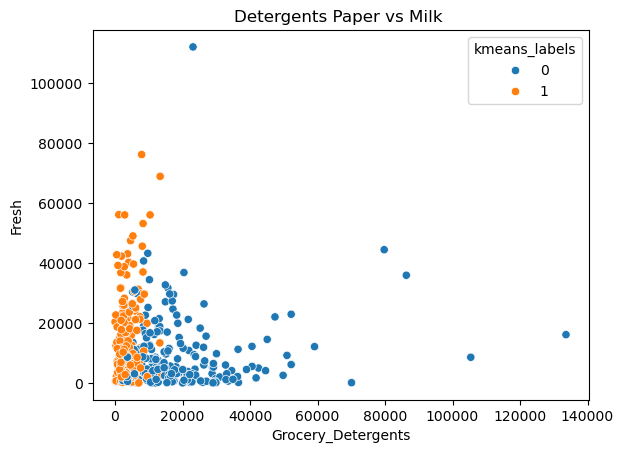

In [26]:
# Your code here:
plot(customers['Grocery_Detergents'],customers["Fresh"],customers["kmeans_labels"])
plot(customers['Grocery_Detergents'],customers["Fresh"],customers["kmeans_labels"])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

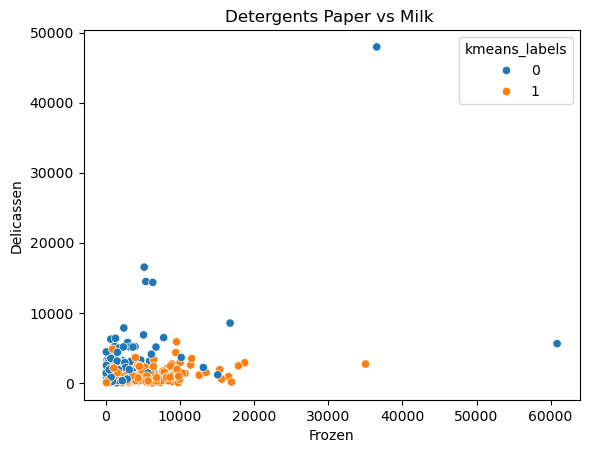

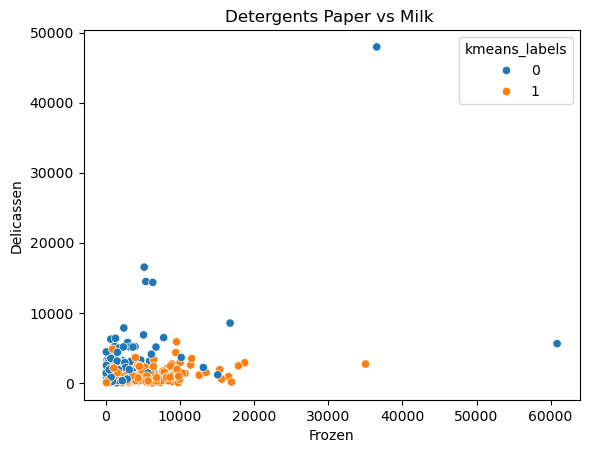

In [27]:
# Your code here:
plot(customers['Frozen'],customers["Delicassen"],customers["kmeans_labels"])
plot(customers['Frozen'],customers["Delicassen"],customers["kmeans_labels"])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [28]:
# Your code here:
customers.drop(columns=["labels","kmeans_labels", "db_labels"]).groupby(customers["kmeans_labels"]).mean()


,Channel,Region,Fresh,Milk,Frozen,Delicassen,Grocery_Detergents
kmeans_labels,,,,,,,
0,1.658416,2.608911,9595.856436,10077.133663,2196.990099,2176.762376,19595.564356
1,1.037815,2.487395,14041.042017,2162.924370,3814.529412,971.584034,3395.441176


In [29]:
customers.drop(columns=["labels","kmeans_labels", "db_labels"]).groupby(customers["db_labels"]).mean()


,Channel,Region,Fresh,Milk,Frozen,Delicassen,Grocery_Detergents
db_labels,,,,,,,
-1,1.320707,2.545455,11887.671717,6045.464646,3112.386364,1538.525253,11286.194444
0,1.000000,2.545455,19288.454545,1414.000000,2398.727273,1076.727273,2507.636364
1,1.833333,2.666667,8184.666667,7006.333333,1447.166667,2007.500000,11986.333333
2,1.000000,2.625000,15281.125000,2243.875000,7718.500000,1144.375000,3091.000000
3,1.857143,2.571429,18497.000000,5511.857143,1143.000000,2128.428571,11393.857143
4,1.800000,2.600000,2486.000000,5462.200000,844.600000,1909.000000,15739.400000
5,1.000000,2.142857,6739.142857,2130.857143,1443.428571,599.857143,2057.428571


In [30]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(customers_scaled, customers['kmeans_labels'])
score_dbscan = silhouette_score(customers_scaled, customers['db_labels'])

print(f"K-Means Silhouette Score: {score_kmeans:.3f}")
print(f"DBSCAN Silhouette Score: {score_dbscan:.3f}")

K-Means Silhouette Score: 0.260
DBSCAN Silhouette Score: -0.383


Which algorithm appears to perform better?

**Your observations here**

K-mean silhouettte Score : 0;260
- A positive score arounnd 0.20-0.30 means that the clusters are fairly distinct but stil very dense
DBSCAN Silhoutette Score : -0.383
- A negative score signal many links between the clusters
- Causes:
-- Unfit tuning for parameters
-- Density structure absent or too heterogeneous for DBSCAN;
-- Too much noise (label -1) disrupting silhouette calculations.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [31]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [32]:
# Your code here

**Your comment here**

- 